In [1]:
from pathlib import Path
from python.optimization import TopOpt
from python.postprocessor import Post3D

ANSYS_path = Path("mapdl")
script_dir = Path("python/")
res_dir    = Path("results/")
mod_dir    = Path("models/")
TopOpt.set_paths(ANSYS_path, script_dir, res_dir, mod_dir)

# Fibreglass

Parts with geometrical function, optimisation with volfrac 0.35

- Traditional composite: S-glass + polyester, fibre volume fraction 0.5
- Eco-optimised: bamboo + cellulose, fibre volume fraction 0.5


Compliance : 603.59 N.mm
Mass : 72.73 g
CO2 footprint: 7172.65 kgCO2


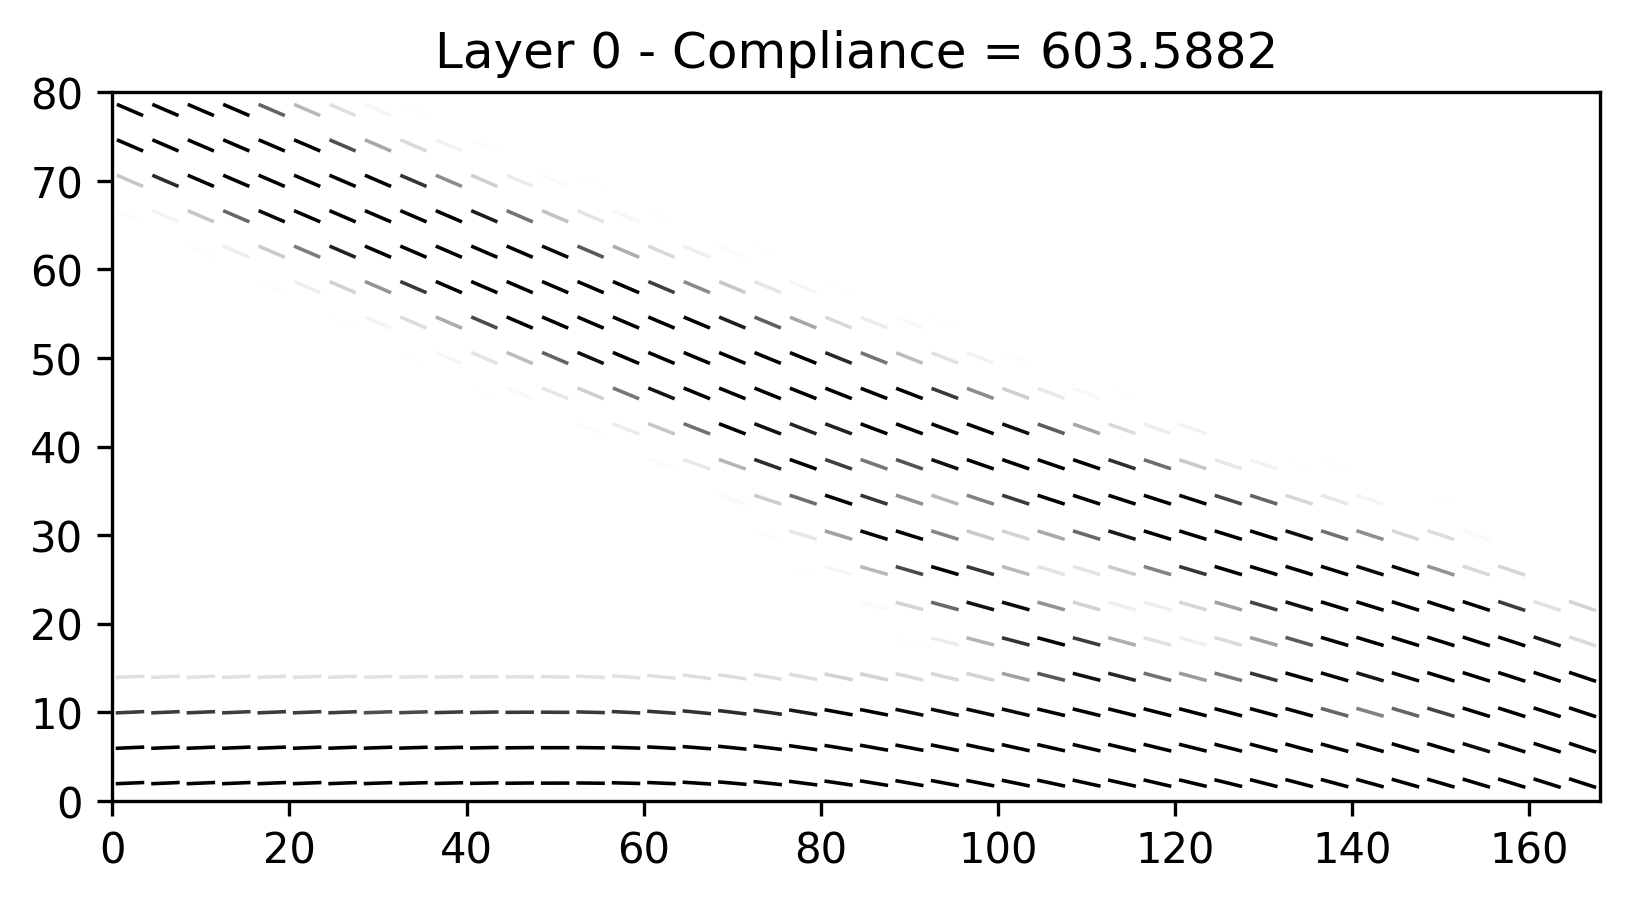

In [2]:
# fiber: S-glass
rhofiber  = 2495e-12 # t/mm^3
Efiber    = 89.5e3 # MPa
vfiber    = 0.22
CO2fiber  = 2.905 # kgCO2/kg

# matrix: polyester
rhomatrix = 1385e-12 # t/mm^3
Ematrix   = 4.55e3 # MPa
vmatrix   = 0.35
CO2matrix = 4.5 # kgCO2/kg

Vfiber  = 0.5
Vmatrix = 1-Vfiber

Gfiber  = Efiber/(2*(1+vfiber))
Gmatrix = Ematrix/(2*(1+vmatrix))

Ex   = Efiber*Vfiber + Ematrix*Vmatrix
Ey   = Efiber*Ematrix / (Efiber*Vmatrix + Ematrix*Vfiber)
Gxy  = Gfiber*Gmatrix / (Gfiber*Vmatrix + Gmatrix*Vfiber)
nuxy = vfiber*Vfiber + vmatrix*Vmatrix
nuyz = nuxy * (1-nuxy*Ey/Ex)/(1-nuxy)
rho  = rhofiber*Vfiber + rhomatrix*Vmatrix

CO2mat = (rhofiber*Vfiber*CO2fiber + rhomatrix*Vmatrix*CO2matrix)/rho # kgCO2/kg
CO2veh = 1030 * 25 * 3.83 # kg_fuel/kg_transported/year * years * kgCO2/kg_fuel = kgCO2/kg

solver = TopOpt(inputfiles='mbb3d', dim='3D_layer', jobname='glass',
            Ex=Ex, Ey=Ey, nuxy=nuxy, nuyz=nuyz, Gxy=Gxy, volfrac=0.35, r_rho=6, r_theta=40,
            max_iter=150, echo=False)
solver.optim()
comp = solver.comp_hist[-1]
        
post = Post3D(solver)
post.plot_layer(layer=0)

print()
print('Compliance : {:.2f} N.mm'.format(comp))
print('Mass : {:.2f} g'.format(1e6 * solver.mass(rho)))
print('CO2 footprint: {:.2f} kgCO2'.format(1000 * solver.CO2_footprint(rho, CO2mat, CO2veh)))


Compliance : 2049.23 N.mm
Mass : 31.66 g
CO2 footprint: 3122.09 kgCO2


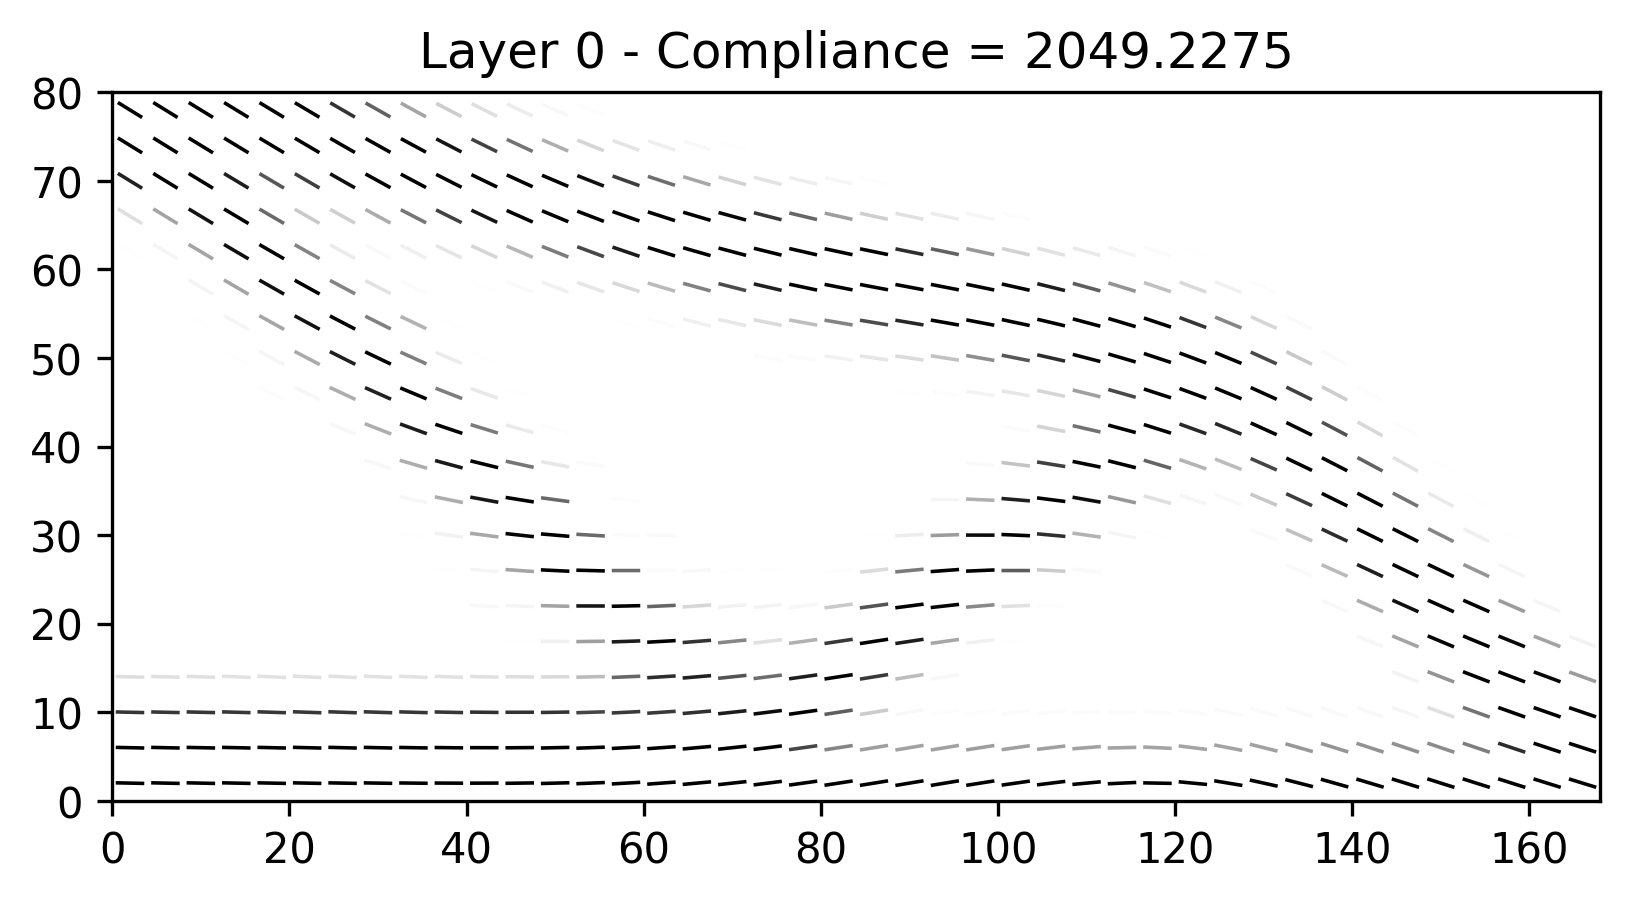

In [3]:
# fiber: bamboo
rhofiber  = 700e-12 # t/mm^3
Efiber    = 17.5e3 # MPa
vfiber    = 0.04
CO2fiber  = 1.0565 # kgCO2/kg

# matrix: cellulose
rhomatrix = 990e-12 # t/mm^3
Ematrix   = 3.25e3
vmatrix   = 0.355 # MPa
CO2matrix = 3.8 # kgCO2/kg

Vfiber  = 0.5
Vmatrix = 1-Vfiber

Gfiber  = Efiber/(2*(1+vfiber))
Gmatrix = Ematrix/(2*(1+vmatrix))

Ex   = Efiber*Vfiber + Ematrix*Vmatrix
Ey   = Efiber*Ematrix / (Efiber*Vmatrix + Ematrix*Vfiber)
Gxy  = Gfiber*Gmatrix / (Gfiber*Vmatrix + Gmatrix*Vfiber)
nuxy = vfiber*Vfiber + vmatrix*Vmatrix
nuyz = nuxy * (1-nuxy*Ey/Ex)/(1-nuxy)
rho  = rhofiber*Vfiber + rhomatrix*Vmatrix

CO2mat = (rhofiber*Vfiber*CO2fiber + rhomatrix*Vmatrix*CO2matrix)/rho # kgCO2/kg
CO2veh = 1030 * 25 * 3.83 # kg_fuel/kg_transported/year * years * kgCO2/kg_fuel = kgCO2/kg

solver = TopOpt(inputfiles='mbb3d', dim='3D_layer', jobname='bamboo',
            Ex=Ex, Ey=Ey, nuxy=nuxy, nuyz=nuyz, Gxy=Gxy, volfrac=0.35, r_rho=6, r_theta=40,
            max_iter=150, echo=False)
solver.optim()
comp = solver.comp_hist[-1]
        
post = Post3D(solver)
post.plot_layer(layer=0)

print()
print('Compliance : {:.2f} N.mm'.format(comp))
print('Mass : {:.2f} g'.format(1e6 * solver.mass(rho)))
print('CO2 footprint: {:.2f} kgCO2'.format(1000 * solver.CO2_footprint(rho, CO2mat, CO2veh)))

# Carbon fibre

Parts with function of providing stiffness, optimisation will search for a target compliance of 1100 N.mm by varying volfrac

- Traditional composite: HM carbon + epoxy, fibre volume fraction 0.5
- Traditional composite 2: S-glass + polyester, fibre volume fraction 0.5
- Eco-optimised: hemp + PLA, fibre volume fraction 0.5

volfrac = 0.4500, compliance = 1803.92 N.mm
volfrac = 0.5750, compliance = 1387.66 N.mm
volfrac = 0.6375, compliance = 945.86 N.mm
volfrac = 0.6062, compliance = 1314.77 N.mm

Compliance : 1062.03 N.mm
Mass : 111.19 g
CO2 footprint: 10977.76 kgCO2


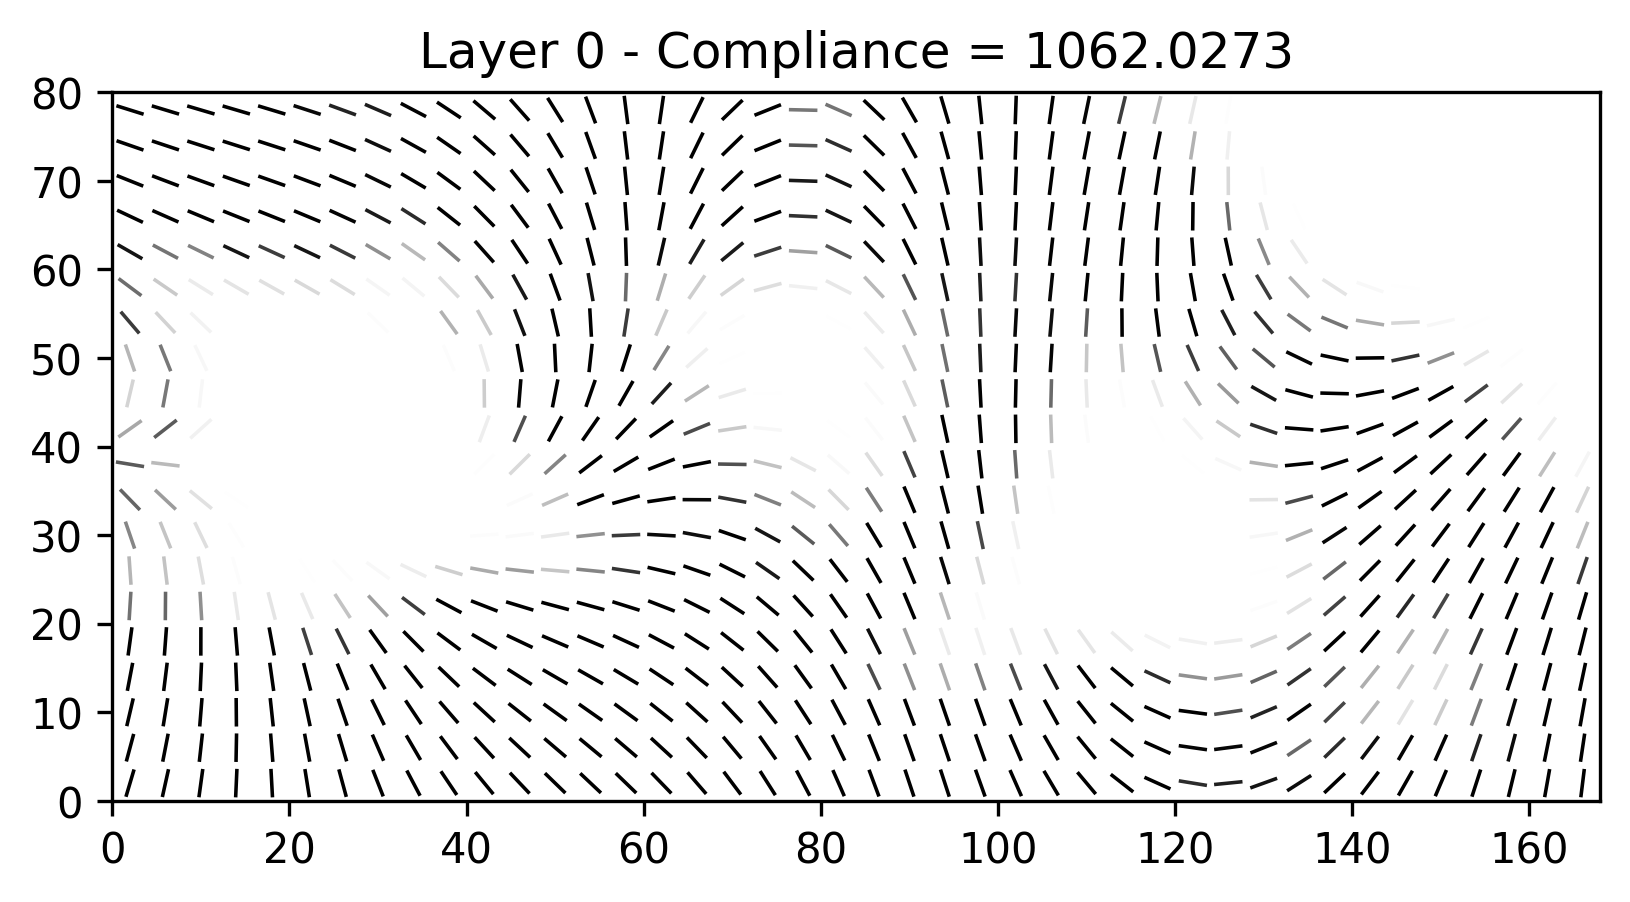

In [3]:
# fiber: HM carbon
rhofiber  = 2105e-12 # t/mm^3
Efiber    = 760e3 # MPa
vfiber    = 0.105
CO2fiber  = 168.1 # kgCO2/kg

# # fiber: LM carbon
# rhofiber  = 1820e-12 # t/mm^3
# Efiber    = 242.5e3 # MPa
# vfiber    = 0.105
# CO2fiber  = 20.3 # kgCO2/kg

# matrix: epoxy
rhomatrix = 1255e-12 # t/mm^3
Ematrix   = 2.41e3 # MPa
vmatrix   = 0.399
CO2matrix = 5.94 # kgCO2/kg

Vfiber  = 0.5
Vmatrix = 1-Vfiber

Gfiber  = Efiber/(2*(1+vfiber))
Gmatrix = Ematrix/(2*(1+vmatrix))

Ex   = Efiber*Vfiber + Ematrix*Vmatrix
Ey   = Efiber*Ematrix / (Efiber*Vmatrix + Ematrix*Vfiber)
Gxy  = Gfiber*Gmatrix / (Gfiber*Vmatrix + Gmatrix*Vfiber)
nuxy = vfiber*Vfiber + vmatrix*Vmatrix
nuyz = nuxy * (1-nuxy*Ey/Ex)/(1-nuxy)
rho  = rhofiber*Vfiber + rhomatrix*Vmatrix

CO2mat = (rhofiber*Vfiber*CO2fiber + rhomatrix*Vmatrix*CO2matrix)/rho # kgCO2/kg
CO2veh = 1030 * 25 * 3.83 # kg_fuel/kg_transported/year * years * kgCO2/kg_fuel = kgCO2/kg

volfracmin = 0.2
volfracmax = 0.7

for i in range(5):
    volfrac = (volfracmin+volfracmax)/2
    solver = TopOpt(inputfiles='mbb3d', dim='3D_layer', jobname='carbon',
                Ex=Ex, Ey=Ey, nuxy=nuxy, nuyz=nuyz, Gxy=Gxy, volfrac=volfrac, r_rho=6, r_theta=40,
                max_iter=150, echo=False)
    solver.optim()
    comp = solver.comp_hist[-1]
    
    print('volfrac = {:.4f}, compliance = {:.2f} N.mm'.format(volfrac,comp))

    if comp < 1100:
        volfracmax = volfrac
    else:
        volfracmin = volfrac
    
    if 1050 < comp and comp < 1150:
        break
        
volfrac = (volfracmin+volfracmax)/2

post = Post3D(solver)
post.plot_layer(layer=0)

print()
print('Compliance : {:.2f} N.mm'.format(comp))
print('Mass : {:.2f} g'.format(1e6 * solver.mass(rho)))
print('CO2 footprint: {:.2f} kgCO2'.format(1000 * solver.CO2_footprint(rho, CO2mat, CO2veh)))

volfrac = 0.3500, compliance = 755.24 N.mm
volfrac = 0.2750, compliance = 2246.81 N.mm
volfrac = 0.3125, compliance = 1247.55 N.mm
volfrac = 0.3312, compliance = 1391.88 N.mm
volfrac = 0.3406, compliance = 1145.03 N.mm

Compliance : 1145.03 N.mm
Mass : 70.65 g
CO2 footprint: 6968.25 kgCO2


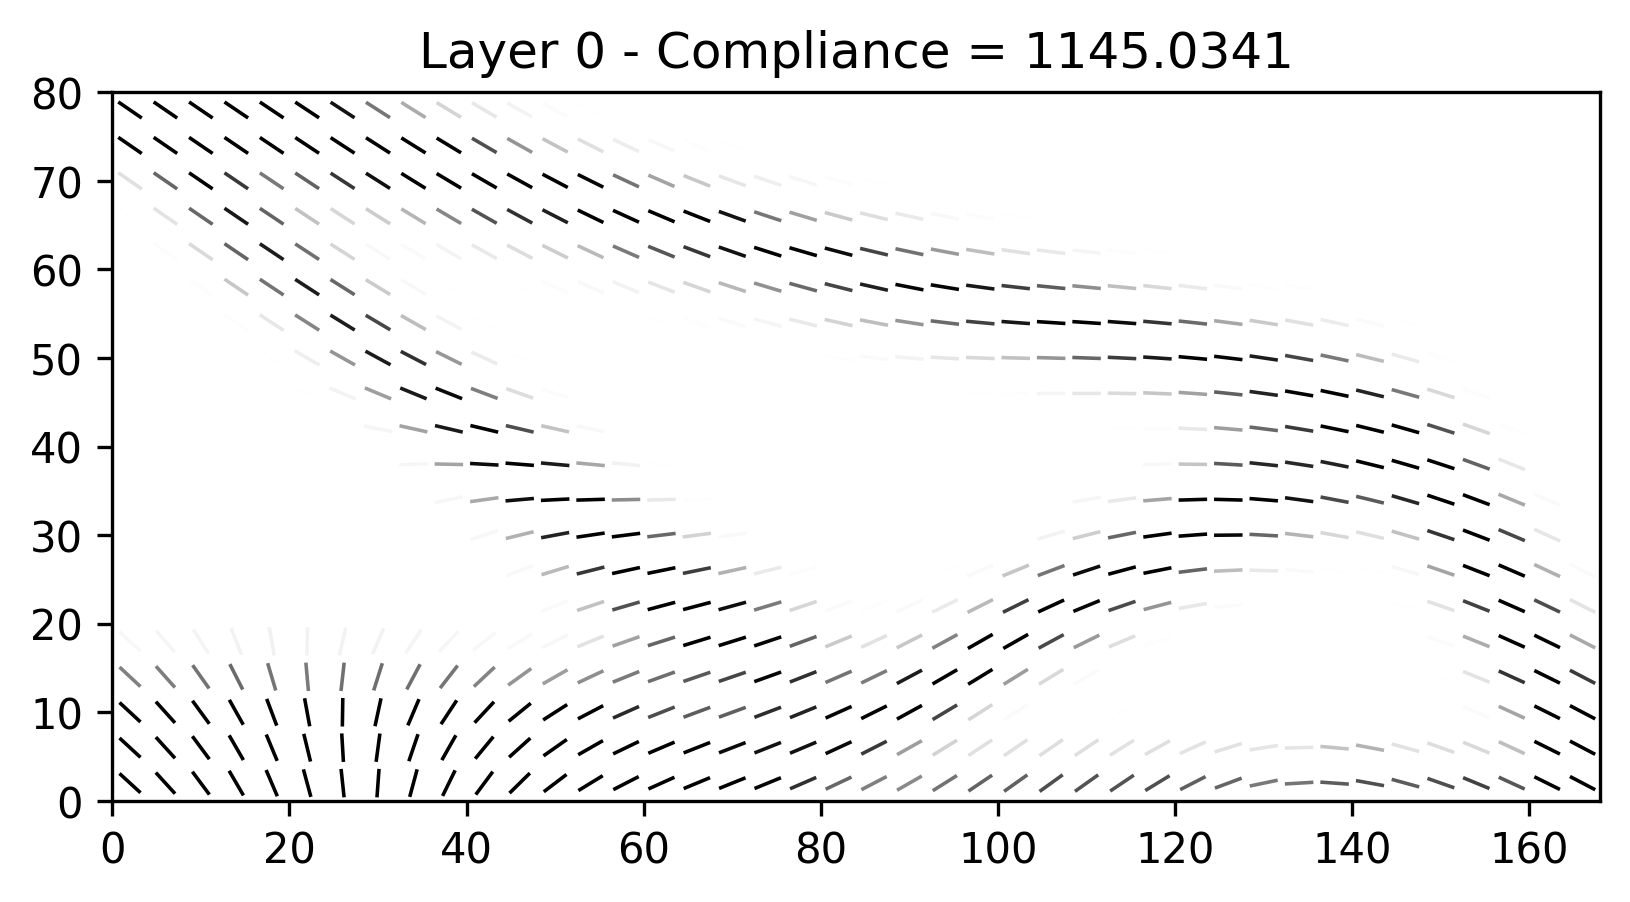

In [8]:
# fiber: S-glass
rhofiber  = 2495e-12 # t/mm^3
Efiber    = 89.5e3 # MPa
vfiber    = 0.22
CO2fiber  = 2.905 # kgCO2/kg

# matrix: polyester
rhomatrix = 1385e-12 # t/mm^3
Ematrix   = 4.55e3 # MPa
vmatrix   = 0.35
CO2matrix = 4.5 # kgCO2/kg

Vfiber  = 0.5
Vmatrix = 1-Vfiber

Gfiber  = Efiber/(2*(1+vfiber))
Gmatrix = Ematrix/(2*(1+vmatrix))

Ex   = Efiber*Vfiber + Ematrix*Vmatrix
Ey   = Efiber*Ematrix / (Efiber*Vmatrix + Ematrix*Vfiber)
Gxy  = Gfiber*Gmatrix / (Gfiber*Vmatrix + Gmatrix*Vfiber)
nuxy = vfiber*Vfiber + vmatrix*Vmatrix
nuyz = nuxy * (1-nuxy*Ey/Ex)/(1-nuxy)
rho  = rhofiber*Vfiber + rhomatrix*Vmatrix

CO2mat = (rhofiber*Vfiber*CO2fiber + rhomatrix*Vmatrix*CO2matrix)/rho # kgCO2/kg
CO2veh = 1030 * 25 * 3.83 # kg_fuel/kg_transported/year * years * kgCO2/kg_fuel = kgCO2/kg

volfracmin = 0.2
volfracmax = 0.5

for i in range(5):
    volfrac = (volfracmin+volfracmax)/2
    solver = TopOpt(inputfiles='mbb3d', dim='3D_layer', jobname='glass',
                Ex=Ex, Ey=Ey, nuxy=nuxy, nuyz=nuyz, Gxy=Gxy, volfrac=volfrac, r_rho=6, r_theta=40,
                max_iter=150, echo=False)
    solver.optim()
    comp = solver.comp_hist[-1]
    
    print('volfrac = {:.4f}, compliance = {:.2f} N.mm'.format(volfrac,comp))

    if comp < 1100:
        volfracmax = volfrac
    else:
        volfracmin = volfrac
    
    if 1050 < comp and comp < 1150:
        break
        
volfrac = (volfracmin+volfracmax)/2

post = Post3D(solver)
post.plot_layer(layer=0)

print()
print('Compliance : {:.2f} N.mm'.format(comp))
print('Mass : {:.2f} g'.format(1e6 * solver.mass(rho)))
print('CO2 footprint: {:.2f} kgCO2'.format(1000 * solver.CO2_footprint(rho, CO2mat, CO2veh)))

volfrac = 0.3500, compliance = 900.76 N.mm
volfrac = 0.2750, compliance = 1233.35 N.mm

Compliance : 1069.62 N.mm
Mass : 46.16 g
CO2 footprint: 4552.29 kgCO2


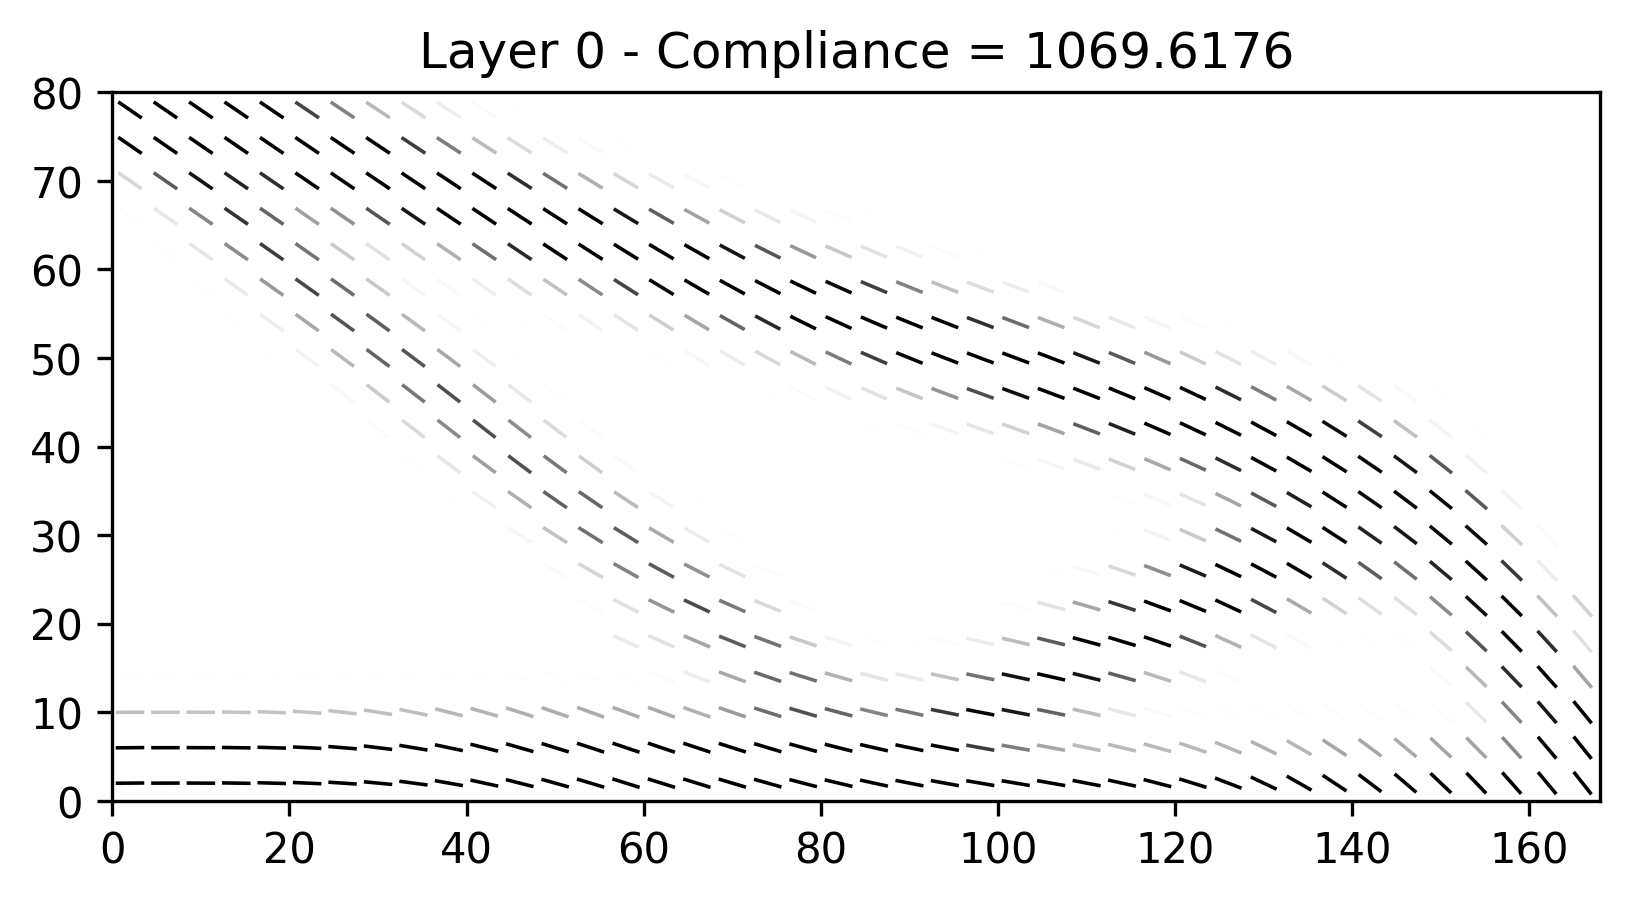

In [4]:
# fiber: hemp
rhofiber  = 1470e-12 # t/mm^3
Efiber    = 53.5e3 # MPa
vfiber    = 0.355
CO2fiber  = 0.44 # kgCO2/kg

# matrix: PLA
rhomatrix = 1290e-12 # t/mm^3
Ematrix   = 5.19e3 # MPa
vmatrix   = 0.39
CO2matrix = 2.115 # kgCO2/kg

Vfiber  = 0.5
Vmatrix = 1-Vfiber

Gfiber  = Efiber/(2*(1+vfiber))
Gmatrix = Ematrix/(2*(1+vmatrix))

Ex   = Efiber*Vfiber + Ematrix*Vmatrix
Ey   = Efiber*Ematrix / (Efiber*Vmatrix + Ematrix*Vfiber)
Gxy  = Gfiber*Gmatrix / (Gfiber*Vmatrix + Gmatrix*Vfiber)
nuxy = vfiber*Vfiber + vmatrix*Vmatrix
nuyz = nuxy * (1-nuxy*Ey/Ex)/(1-nuxy)
rho  = rhofiber*Vfiber + rhomatrix*Vmatrix

CO2mat = (rhofiber*Vfiber*CO2fiber + rhomatrix*Vmatrix*CO2matrix)/rho # kgCO2/kg
CO2veh = 1030 * 25 * 3.83 # kg_fuel/kg_transported/year * years * kgCO2/kg_fuel = kgCO2/kg

volfracmin = 0.2
volfracmax = 0.5

for i in range(5):
    volfrac = (volfracmin+volfracmax)/2
    solver = TopOpt(inputfiles='mbb3d', dim='3D_layer', jobname='hemp',
                Ex=Ex, Ey=Ey, nuxy=nuxy, nuyz=nuyz, Gxy=Gxy, volfrac=volfrac, r_rho=6, r_theta=40,
                max_iter=150, echo=False)
    solver.optim()
    comp = solver.comp_hist[-1]
    
    print('volfrac = {:.4f}, compliance = {:.2f} N.mm'.format(volfrac,comp))

    if comp < 1100:
        volfracmax = volfrac
    else:
        volfracmin = volfrac
        
    if 1050 < comp and comp < 1150:
        break

volfrac = (volfracmin+volfracmax)/2
        
post = Post3D(solver)
post.plot_layer(layer=0)

print()
print('Compliance : {:.2f} N.mm'.format(comp))
print('Mass : {:.2f} g'.format(1e6 * solver.mass(rho)))
print('CO2 footprint: {:.2f} kgCO2'.format(1000 * solver.CO2_footprint(rho, CO2mat, CO2veh)))